In [335]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [336]:
data = pd.read_csv("insurance_claims.csv")
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [337]:
data.drop('_c39',axis=1,inplace=True)

In [338]:
# To print no of unique values in each columns of a dataset
unique_value = data.nunique(axis=0) 
table= pd.DataFrame()
table['Value']= unique_value            
table=table.sort_values('Value',ascending=False)
table

,Value
policy_number,1000
incident_location,1000
insured_zip,995
policy_annual_premium,991
policy_bind_date,951
total_claim_amount,763
vehicle_claim,726
injury_claim,638
property_claim,626
months_as_customer,391


In [339]:
data.drop(['months_as_customer','incident_location','insured_relationship','capital-gains', 'capital-loss','policy_deductable','age','incident_date','number_of_vehicles_involved','collision_type','authorities_contacted','insured_hobbies','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number','insured_education_level'],axis=1,inplace=True)

In [340]:
print(data.columns)

Index(['policy_state', 'policy_csl', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'Claim_type', 'incident_type',
       'incident_severity', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')


In [341]:
#lets do Lable enconding coding to make more features 

le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

5 columns were label encoded.


In [342]:
data = pd.get_dummies(data)
print('Training Features shape: ', data.shape)

Training Features shape:  (1000, 58)


In [343]:
y=data['fraud_reported']
X= data.drop('fraud_reported',axis=1)

In [344]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [346]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
model1= GradientBoostingClassifier(n_estimators=20, learning_rate=1.0)
model1.fit(X_train,y_train)
predictors=list(X_train)

Accuracy of the GBM on test set: 0.797


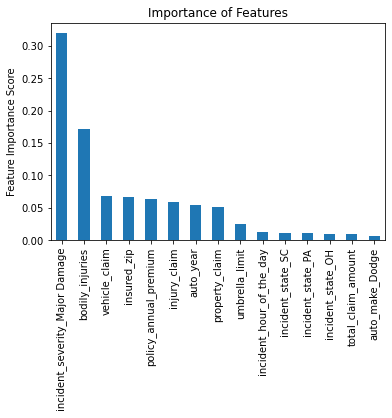

In [347]:
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feature = feat_imp.head(15)
feature.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))

In [348]:
from sklearn.metrics import classification_report,confusion_matrix
pred=model1.predict(X_test)
print(pred)

[1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0]


In [349]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       223
           1       0.61      0.57      0.59        77

    accuracy                           0.80       300
   macro avg       0.73      0.72      0.73       300
weighted avg       0.79      0.80      0.79       300



In [350]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

Confusion Matrix:
[[195  28]
 [ 33  44]]
